In [1]:
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-lfandic7
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-lfandic7
  Resolved https://github.com/google/lightweight_mmm.git to commit f61a18b9883c2dccac8e360970935e3b6ee8265e
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install mlflow

In [71]:
# Importing necessary libraries
import jax.numpy as jnp
import numpyro
numpyro.set_host_device_count(2)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

# Load your data (replace with the actual path to your CSV file)
data_path = '/content/dummyData - Sheet8.csv'
data = pd.read_csv(data_path, index_col=False)

#data['leads'] = data['leads'].astype(int).copy()
#data['search'] = data['search'].astype(int).copy()
#data['performance_max'] = data['performance_max'].astype(int).copy()
#data['display'] = data['display'].astype(int).copy()
#data['leads'] = data['leads'].astype(int).copy()
#data['video'] = data['video'].astype(int).copy()
#data['newspaper'] = data['newspaper'].astype(bool).copy()
#data['week'] = pd.to_datetime(data['week'])
#data.fillna(0, inplace=True)
#data['weekday'] = data['weekday'].astype(str).copy()
#data.head()
data.head(150)

,week_starting,leads,search,performance_max,display,video
0,01/01/2021,564,3754,0,0,0
1,08/01/2021,458,11607,0,0,0
2,15/01/2021,545,8712,0,0,0
3,22/01/2021,595,6399,0,0,0
4,29/01/2021,572,8640,0,0,0
...,...,...,...,...,...,...
131,07/07/2023,498,23415,3636,3468,3080
132,14/07/2023,490,22389,3509,2977,2560
133,21/07/2023,482,19248,3511,3222,2290
134,28/07/2023,555,19722,3401,3035,2508


In [ ]:
#print(data[~data['cost_af'].apply(np.isfinite)])

In [ ]:
#weekday_coded = pd.get_dummies(data['weekday'], prefix='weekday')
#concat_data = pd.concat([data, weekday_coded], axis=1).copy()
#concat_data.dtypes

<ipython-input-72-2f4ea3e4632c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


                    leads    search  performance_max   display     video
leads            1.000000  0.386131         0.390140  0.163161  0.192109
search           0.386131  1.000000         0.575716  0.426413  0.271647
performance_max  0.390140  0.575716         1.000000  0.653685  0.115307
display          0.163161  0.426413         0.653685  1.000000  0.043838
video            0.192109  0.271647         0.115307  0.043838  1.000000


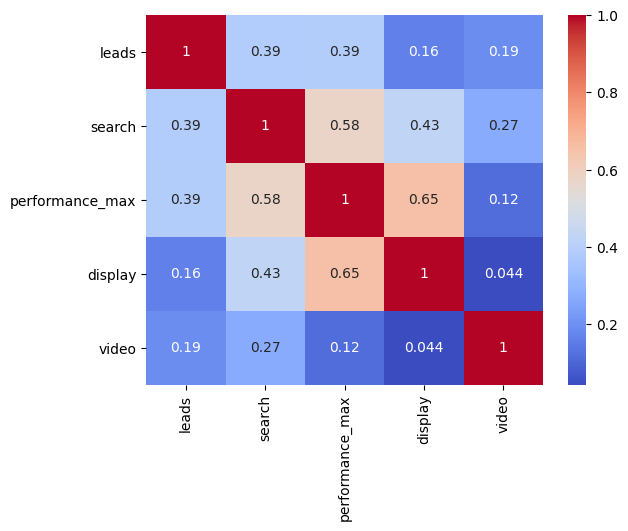

<Figure size 2500x480 with 0 Axes>

<Figure size 640x2000 with 0 Axes>

In [72]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure().set_figwidth(25)
plt.figure().set_figheight(20)
plt.show()

In [ ]:
mlflow.get_tracking_uri()

'http://localhost:5000'

In [ ]:
#mlflow.create_experiment("0")

In [78]:
# Define the target feature
#target_feat = data['leads'].to_numpy()
#mdsp_cols = ["cost_fb","cost_ga","cost_bing","adform_cost"]
#weekday_cols = ["weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6", "weekday_7"]
#weekday_cols = data[f"weekday_{i}" for i in range(1, 8)]
#weekday_cols_numpy = data[weekday_cols].to_numpy()
#media_data = data[mdsp_cols].to_numpy()
#n_media_channels = len(mdsp_cols)
#costs = data[mdsp_cols].sum().to_numpy()
#mlflow.autolog()
SEED = 50
data_size = 135
# Define the target feature
target_feat = data['leads'].to_numpy()
mdsp_cols = ["search","performance_max", "display", "video"]
media_data = data[mdsp_cols].to_numpy()
#weekday_data = data[weekday_cols].to_numpy()
n_media_channels = len(mdsp_cols)
costs = data[mdsp_cols].sum().to_numpy()




#Need to split into train and test

test_data_period_size = 25
split_point = data_size - test_data_period_size
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]

target_train = target_feat[:split_point]
# Extract the weekday columns as extra features
#weekday_data = data[weekday_cols].to_numpy()

# Combine media data and weekday data into a single feature matrix
#combined_features = np.hstack((weekday_cols1))

# Need to scale the features and target_kpi

media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

# Create a LightweightMMM object
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    media_names=mdsp_cols,
    #extra_features=weekday_cols,
    seed=SEED
)
#mmm.print_summary()
# Preprocess the data (scaling, transformations, etc.)
#mmm.preprocessing()
#target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
# Train the model
#mmm.train()

# Optimize media spend
#optimized_spend = mmm.optimize_media_spend()

# Print the optimized media spend
#print("Optimized Media Spend:")
#print(optimized_spend)

# You can also plot the results
mmm.plot()


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
import mlflow
from multiprocessing import Process

def start_mlflow_server():
    !mlflow server --host 0.0.0.0 --port 5000

server_process = Process(target=start_mlflow_server)
server_process.start()


In [ ]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
#with mlflow.start_run() as run:
#   mlflow.log_model("model", artifact_path="mmm")


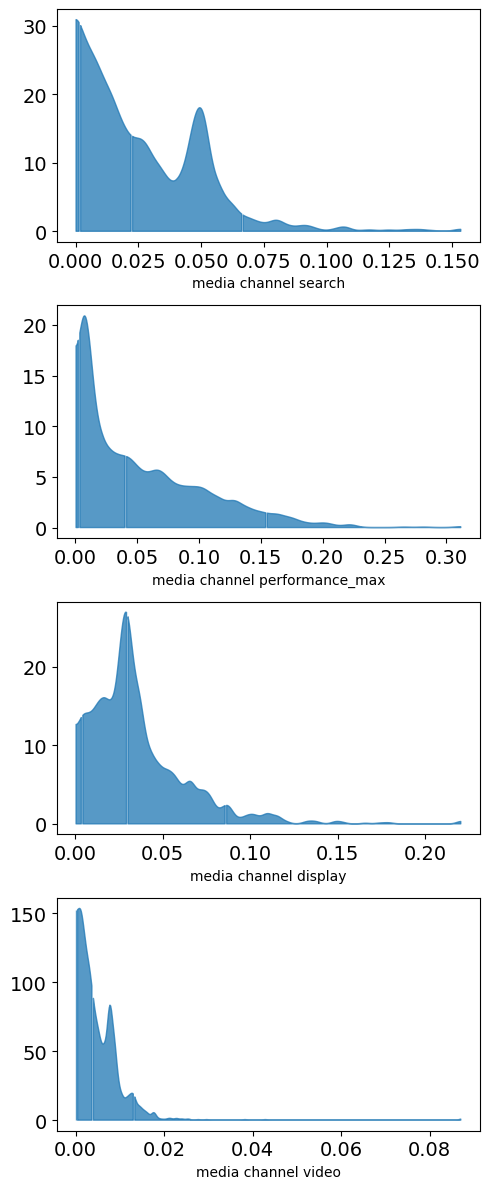

In [74]:
plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=mdsp_cols)

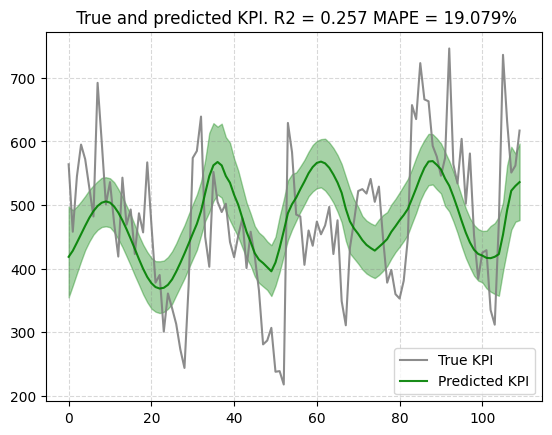

In [75]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [76]:
#new_predictions = mmm.predict(
#   media=media_data_train
#)

new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              seed=SEED)

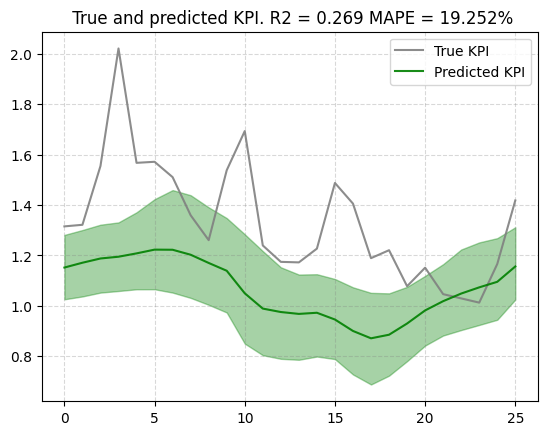

In [77]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target_feat[split_point:]))

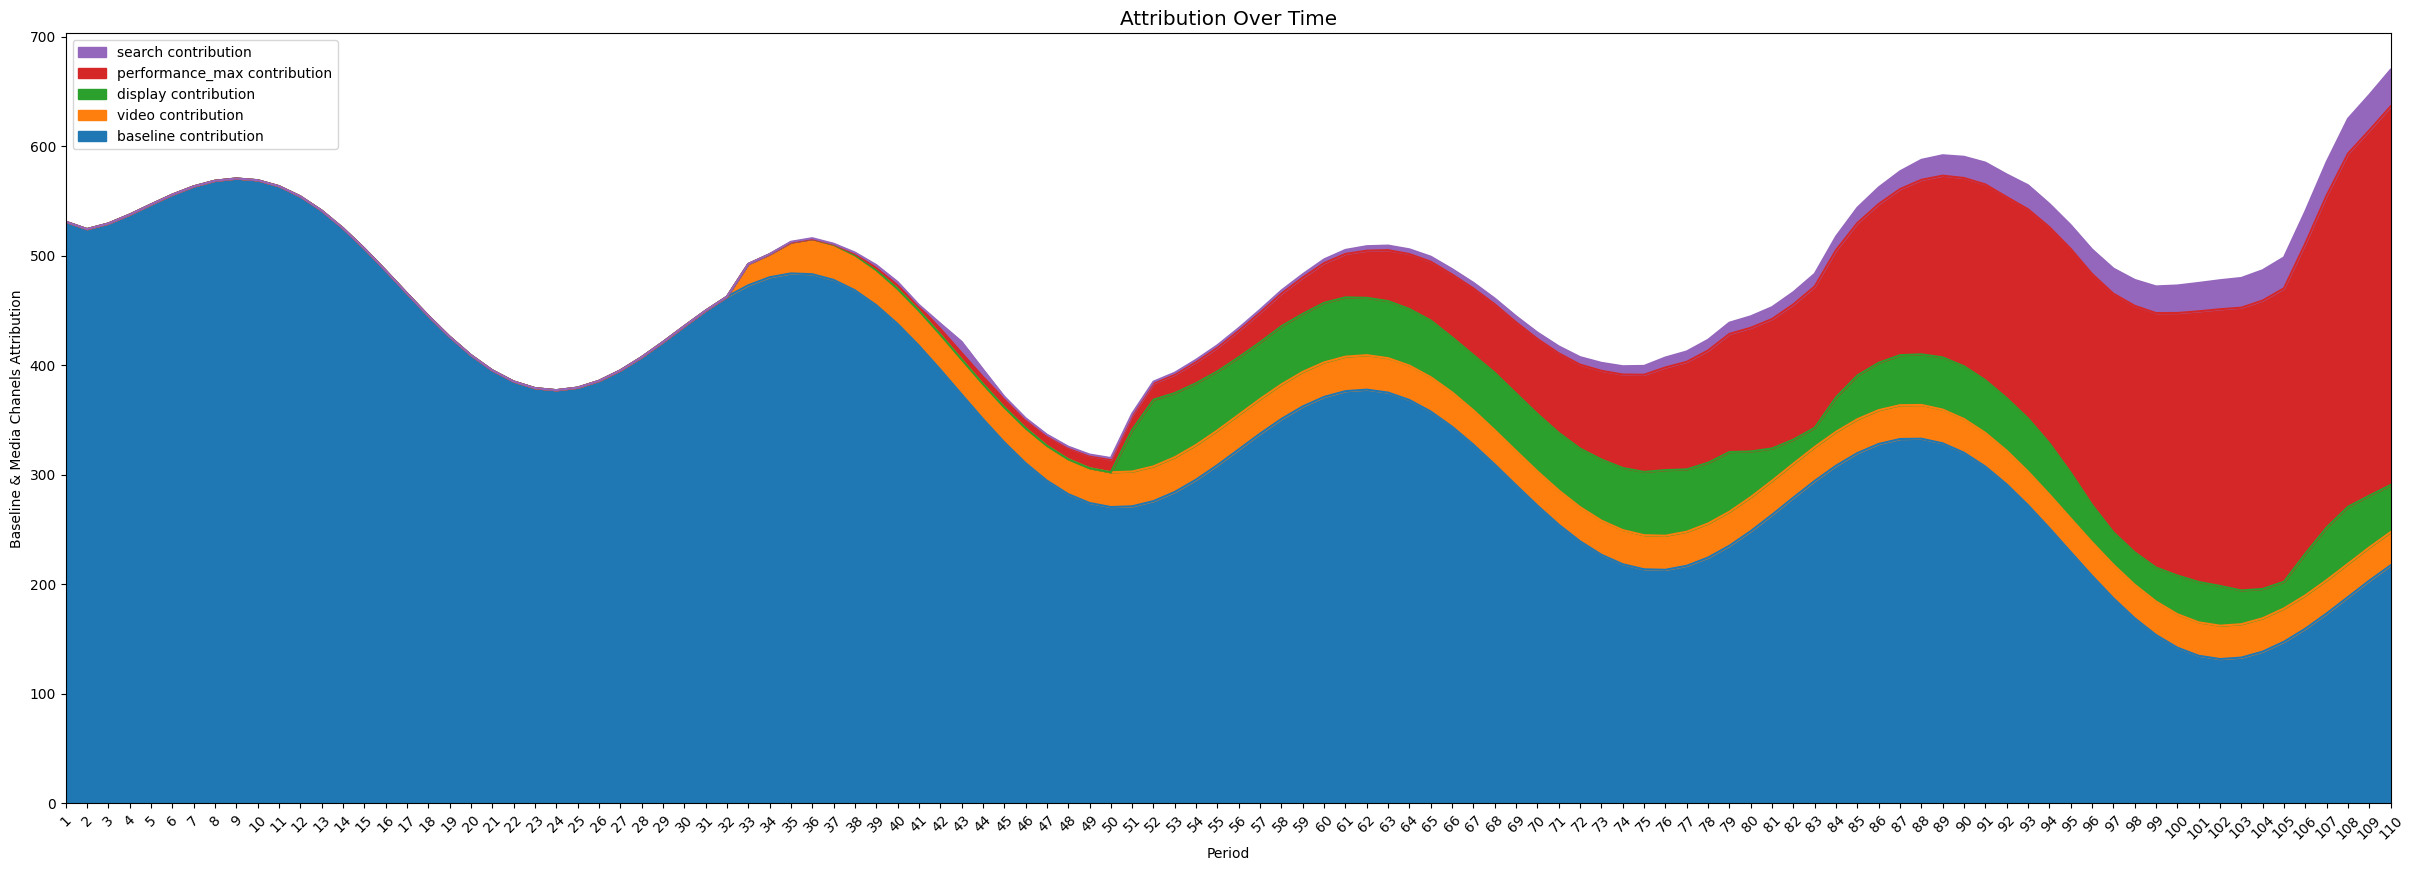

In [62]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols
                                                )

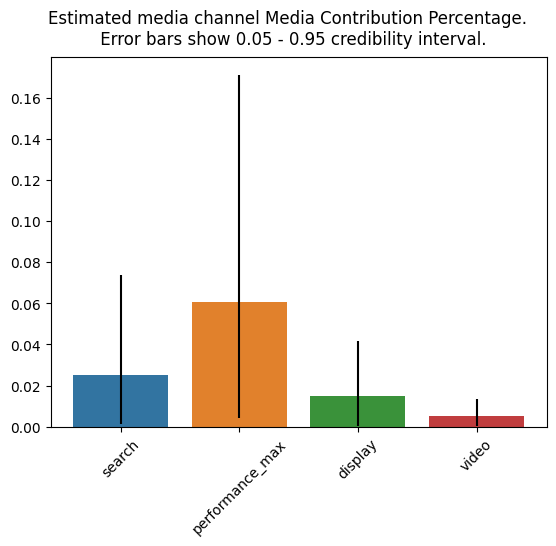

In [10]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)


                    leads    search  performance_max   display     video
leads            1.000000  0.386131         0.390169  0.163128  0.192042
search           0.386131  1.000000         0.575676  0.426395  0.271557
performance_max  0.390169  0.575676         1.000000  0.653618  0.115272
display          0.163128  0.426395         0.653618  1.000000  0.043805
video            0.192042  0.271557         0.115272  0.043805  1.000000


<ipython-input-11-2f4ea3e4632c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


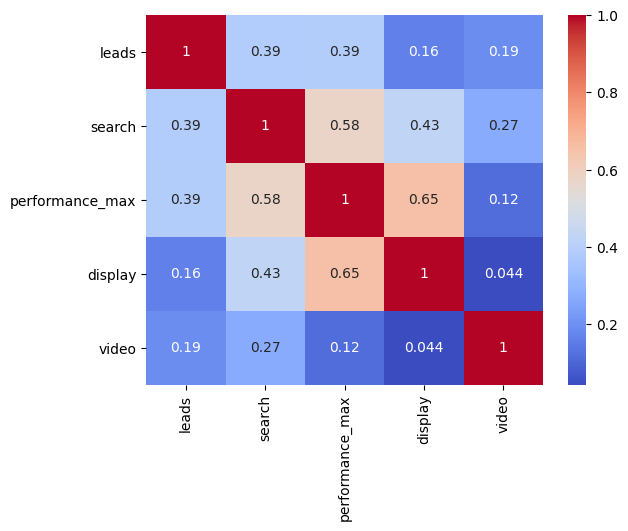

<Figure size 2500x480 with 0 Axes>

<Figure size 640x2000 with 0 Axes>

In [11]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure().set_figwidth(25)
plt.figure().set_figheight(20)
plt.show()

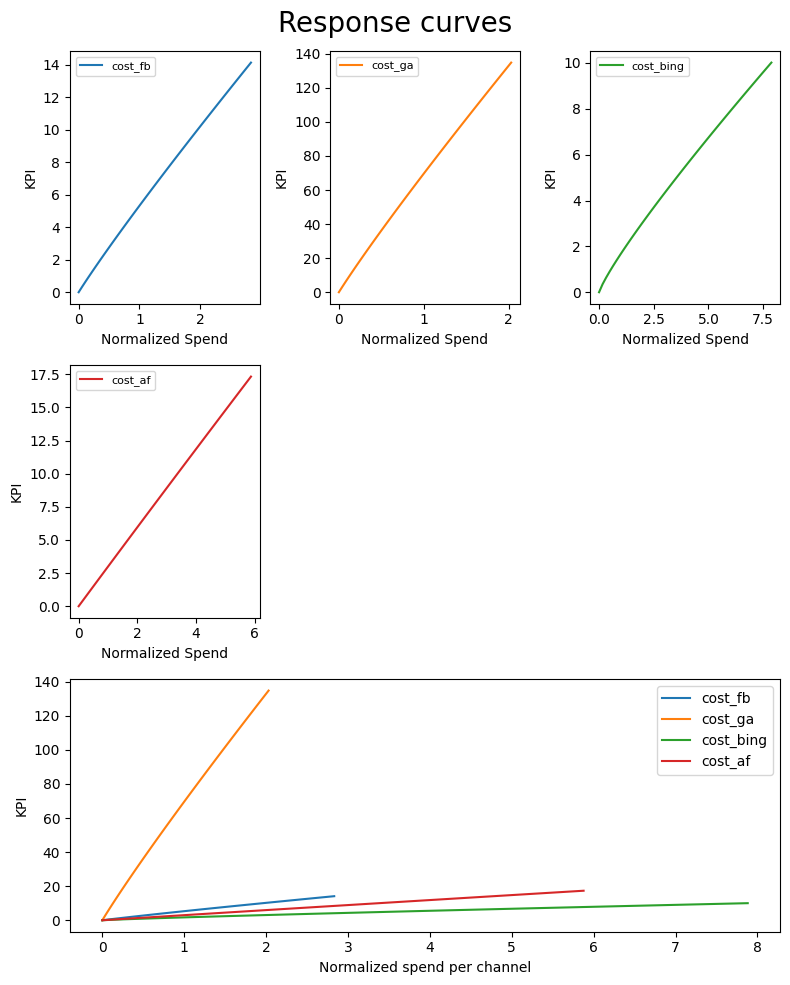

In [ ]:
plot.plot_response_curves(target_scaler=target_scaler, media_mix_model=mmm, seed=SEED)


In [ ]:
#print(media_contribution)

In [ ]:
predicted_cost = mdsp_cols['cost_fb'].sum()
print(predicted_cost)

TypeError: ignored

In [ ]:
import pandas as pd
print(new_predictions)

[[1.2671919  1.3048174  1.3244715  ... 1.0106435  1.0030074  1.0738254 ]
 [1.2810804  1.3106353  1.3285918  ... 0.9169292  0.9066219  1.0442011 ]
 [1.4135659  1.4811807  1.5189985  ... 1.0198059  1.0099634  1.0693283 ]
 ...
 [1.1913555  1.2289491  1.2379305  ... 0.9243262  0.91323924 0.9901918 ]
 [1.4256647  1.4842994  1.5153913  ... 0.96913123 0.9822861  1.0775315 ]
 [1.325194   1.3908699  1.4227657  ... 0.9429437  0.9476898  1.007454  ]]


In [ ]:
# Assuming media_contribution is an array or list with the media contribution for each channel
# and mdsp_cols is a list of channel names

# Specific channel you want to predict leads for
channel_name = 'cost_ga'

# Index of the channel in mdsp_cols
channel_index = mdsp_cols.index(channel_name)

# Media contribution for the specific channel
channel_contribution = media_contribution[channel_index]

# Spend or other input variable for the specific channel (you would replace this with the actual value)
channel_spend = 6750

# Calculate the predicted leads for the specific channel
predicted_leads = channel_contribution * channel_spend

print(f"Predicted leads for {channel_name}: {predicted_leads}")


Predicted leads for cost_ga: [  21.011581 2286.432     332.85367   687.5402  ]


In [ ]:
# Daily channel spend for the cost_ga channel (replace with actual values)
daily_channel_spend = [2000, 3000]

# Predicted leads (from your previous output)
predicted_leads = [81.57488]

# Calculate daily CPL
daily_cpl = [spend / leads for spend, leads in zip(daily_channel_spend, predicted_leads)]

# Calculate average CPL
total_channel_spend = sum(daily_channel_spend)
total_predicted_leads = sum(predicted_leads)
average_cpl = total_channel_spend / total_predicted_leads

print(f"Daily CPL: {daily_cpl}")
print(f"Average CPL: {average_cpl}")


Daily CPL: [24.517351419946927]
Average CPL: 61.29337854986732


In [12]:
prices = jnp.ones(mmm.n_media_channels)

In [13]:
n_time_periods = 4
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods


In [14]:
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2111.2475555882666
            Iterations: 27
            Function evaluations: 243
            Gradient evaluations: 27


In [15]:
optimal_budget_allocation = prices * solution.x
optimal_budget_allocation

Array([119478.11,  12132.36,  10712.8 ,   1413.64], dtype=float32)

In [16]:
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([122309.484 ,  10716.323 ,   9462.448 ,   1248.6461], dtype=float32)

In [17]:
budget, optimal_budget_allocation.sum()

(Array(143736.9, dtype=float32), Array(143736.9, dtype=float32))

In [18]:
budget, jnp.sum(solution.x * prices)

(Array(143736.9, dtype=float32), Array(143736.9, dtype=float32))

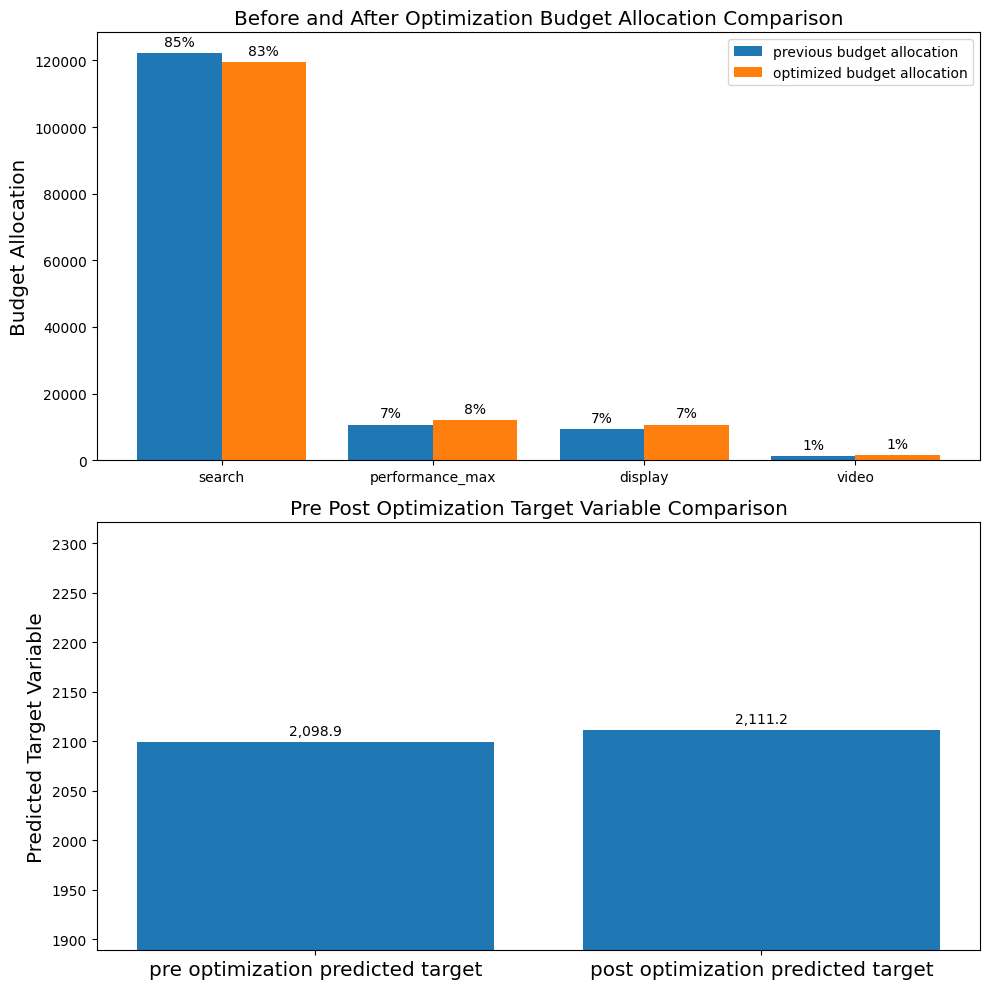

In [19]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_budget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols)

In [ ]:
import neptune
model = neptune.init_model(
    name="Prediction model",
    key="MOD",
    project="fsgorm/Lightweight-mmm",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI0NzNlY2JjMC02YmE1LTQzNTAtYWI2OC02YzMyNmRiZDk1ZDcifQ==", # your credentials
)

https://app.neptune.ai/fsgorm/Lightweight-mmm/m/LIG-MOD


In [ ]:
import neptune
model_version = neptune.init_model_version(
    model="LIG-MOD",
    project="fsgorm/Lightweight-mmm",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI0NzNlY2JjMC02YmE1LTQzNTAtYWI2OC02YzMyNmRiZDk1ZDcifQ==", # your credentials
)

https://app.neptune.ai/fsgorm/Lightweight-mmm/m/LIG-MOD/v/LIG-MOD-1


In [ ]:
! pip install neptune-notebooks
! jupyter nbextension enable --py neptune-notebooks

Enabling notebook extension neptune-notebooks/neptune-notebook...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import os
os.environ["NEPTUNE_API_TOKEN"] = my_api_token

In [ ]:
from getpass import getpass


my_api_token1 = getpass("Enter your Neptune API token: ")


Enter your Neptune API token: ··········


In [ ]:
import neptune
run = neptune.init_run(api_token=my_api_token, project=my_project)

model = neptune.init_model(
    with_id="LIG-3"
    # Your model ID here
)
model["data/train"].track_files("/content/dummyData - Sheet5.csv")
model["data/validation/dataset/v0.1"].track_files("/content/dummyData - Sheet5.csv")


https://app.neptune.ai/fsgorm/Lightweight-mmm/e/LIG-11


NeptuneMissingProjectNameException: ignored

In [ ]:
run = neptune.init_run(source_files=["Kopi af MMMProjekt_med_predictions.ipynb"])  # example

NeptuneMissingProjectNameException: ignored